# Class1: 神经网络计算

## Prereisites

### Setup virtul environment

- `python3.7` + `TensorFlow2.1.0` + `sklearn` + `pandas` + `matplotlib`

## TensorFlow2 安装
- 安装Anaconda Python 3.7
- TensorFlow2安装
  - conda create -n TF2.1 python=3.7
  - conda active TF2.1
  - conda install cudatoolkit=10.1
  - conda install cudnn=7.6
  - pip install TensorFlow==2.1.0
    - python
    - import TensorFlow as tf

## 人工智能三学派
- 行为主义
- 符号主义
- 连接主义
  - 神经网络
  - 计算机仿真神经网络连接关系
    - 准备数据:'特征-标签'数据
    - 搭建网络:神经网络结构
    - 优化参数:训练网络获取最佳参数
    - 应用网络:输出分类，或输出预测结果

## 神经网络设计过程
- 分类目标:
  - **0**狗尾草Iris
  - **1**杂色Iris: 花萼长>花萼宽 and 花瓣长/花瓣宽>2
  - **2**弗吉尼亚Iris
- 采集大量**数据对**作为**数据集**: 输入特征(花萼长，花萼宽，花瓣长，花瓣宽), 人工标定的标签(对应的类别)
- 将已有数据集喂入搭建好的**神经网络结构**
- **随机初始化**所有参数, 然后反向传播进行网络**优化参数**,**得到模型**
  - 损失函数输出最小(预测值与标准答案之间的差距)，得到所有的最优参数
    - 梯度下降法
      - 设置合适的学习率(超参数): 不可以过大或者过小
- 读入新输入特征(待测)
- 输出识别结果: 所属分类

### Iris分类的神经网络优化参数
- 计算最优w和b

In [ ]:
# p13_backpropagation.py
import tensorflow as tf

w = tf.Variable(tf.constant(5, dtype=tf.float32))   # tf.Variable()定义变量为可训练(可自更新)属性
lr = 0.2
# lr = 0.001
# lr = 0.999

epoch = 40

for epoch in range(epoch):  # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环40次迭代。
    with tf.GradientTape() as tape:  # with结构到grads框起了梯度的计算过程。
        loss = tf.square(w + 1)
    grads = tape.gradient(loss, w)  # .gradient函数告知谁对谁求导

    w.assign_sub(lr * grads)  # .assign_sub 对变量做自减 即：w -= lr*grads 即 w = w - lr*grads
    print("After %s epoch,w is %f,loss is %f" % (epoch, w.numpy(), loss))

# lr初始值：0.2   请自改学习率  0.001  0.999 看收敛过程
# 最终目的：找到 loss 最小 即 w = -1 的最优参数w

After 0 epoch,w is 2.600000,loss is 36.000000
After 1 epoch,w is 1.160000,loss is 12.959999
After 2 epoch,w is 0.296000,loss is 4.665599
After 3 epoch,w is -0.222400,loss is 1.679616
After 4 epoch,w is -0.533440,loss is 0.604662
After 5 epoch,w is -0.720064,loss is 0.217678
After 6 epoch,w is -0.832038,loss is 0.078364
After 7 epoch,w is -0.899223,loss is 0.028211
After 8 epoch,w is -0.939534,loss is 0.010156
After 9 epoch,w is -0.963720,loss is 0.003656
After 10 epoch,w is -0.978232,loss is 0.001316
After 11 epoch,w is -0.986939,loss is 0.000474
After 12 epoch,w is -0.992164,loss is 0.000171
After 13 epoch,w is -0.995298,loss is 0.000061
After 14 epoch,w is -0.997179,loss is 0.000022
After 15 epoch,w is -0.998307,loss is 0.000008
After 16 epoch,w is -0.998984,loss is 0.000003
After 17 epoch,w is -0.999391,loss is 0.000001
After 18 epoch,w is -0.999634,loss is 0.000000
After 19 epoch,w is -0.999781,loss is 0.000000
After 20 epoch,w is -0.999868,loss is 0.000000
After 21 epoch,w is -0.9

## 张量生成

### 创建张量

In [ ]:
# p17_constant.py
import tensorflow as tf

a = tf.constant([1, 5], dtype=tf.int64)
print("a:", a)
print("a.dtype:", a.dtype)
print("a.shape:", a.shape)

a: tf.Tensor([1 5], shape=(2,), dtype=int64)
a.dtype: <dtype: 'int64'>
a.shape: (2,)


### 转化成张量

In [ ]:
# p18_convert_to_tensor.py
import tensorflow as tf
import numpy as np

a = np.arange(0, 5)
b = tf.convert_to_tensor(a, dtype=tf.int64)
print("a:", a)
print("b:", b)

a: [0 1 2 3 4]
b: tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


### 不同维度

In [ ]:
# p19_zeros_ones_fill.py
import tensorflow as tf

a = tf.zeros([2, 3])    # 二维，2行3列
b = tf.ones(4)          # 一维
c = tf.fill([2, 2], 9)  # 多维 2行2列，用元素为9
print("a:", a)
print("b:", b)
print("c:", c)

a: tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
b: tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)
c: tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


### 生成值

In [ ]:
# p21_random.normal.py
import tensorflow as tf

d = tf.random.normal([2, 2], mean=0.5, stddev=1)
print("d:", d)

# tf.random.truncated_normal() 可以保证生成值在均值附近(均值+2*标准差； 均值-2*标准差)
e = tf.random.truncated_normal([2, 2], mean=0.5, stddev=1)
print("e:", e)


d: tf.Tensor(
[[-1.0630833   1.810489  ]
 [ 0.38028917  0.74174047]], shape=(2, 2), dtype=float32)
e: tf.Tensor(
[[0.01437405 1.9270004 ]
 [1.3503292  1.1851509 ]], shape=(2, 2), dtype=float32)


### 生成均匀随机数

In [ ]:
# p22_random.uniform.py
import tensorflow as tf

# 生成均匀分布随机数，前闭后开[minval, maxval)
f = tf.random.uniform([2, 2], minval=0, maxval=1)
print("f:", f)

f: tf.Tensor(
[[0.37125707 0.92167485]
 [0.48856616 0.9187217 ]], shape=(2, 2), dtype=float32)


### 强制数据类型的转换

In [ ]:
# p23_cast_reduce_minmax.py
import tensorflow as tf

x1 = tf.constant([1., 2., 3.], dtype=tf.float64)
print("x1:", x1)

# 强制转换数据类型
x2 = tf.cast(x1, tf.int32)
print("x2", x2)
print("minimum of x2：", tf.reduce_min(x2))
print("maxmum of x2:", tf.reduce_max(x2))

x1: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
x2 tf.Tensor([1 2 3], shape=(3,), dtype=int32)
minimum of x2： tf.Tensor(1, shape=(), dtype=int32)
maxmum of x2: tf.Tensor(3, shape=(), dtype=int32)


## 常用函数

- reduce_mean,reduce_sum
  - axis=0:纵向，经度方向
  - axis=1:横向，维度方向
- 维度相同的张量可以做四则运算
  - add, subtract, multiply, divide.
- 平方, 次方, 开方
  - square, pow, sqrt
- 矩阵乘
  - tf.matmul
- 将(特征, 标签)进行配对
  - tf.data.Dataset.from_tensor_slices((features, labels))
- 梯度
  - tf.GradientTape
- 枚举, python内置函数
  - enumerate
- 独热编码,作为标签
  - tf.one_hot
  - 1: 表示是
  - 0: 表示非
- 使输出符合概率分布
  -tf.nn.softmax  -->n分类n输出调用softmax()函数
- 自减
  - assign_sub
- 张量方向最大值的索引
  - tf.argmax()

In [ ]:
# p25_reduce_meansum.py
import tensorflow as tf

x = tf.constant([[1, 2, 3], [2, 2, 3]])
print("x:", x)
print("mean of x:", tf.reduce_mean(x))  # 求x中所有数的均值
print("sum of x:", tf.reduce_sum(x, axis=1))  # 求每一行的和

x: tf.Tensor(
[[1 2 3]
 [2 2 3]], shape=(2, 3), dtype=int32)
mean of x: tf.Tensor(2, shape=(), dtype=int32)
sum of x: tf.Tensor([6 7], shape=(2,), dtype=int32)


In [ ]:
# p29_add_subtract_multiply_divide.py
import tensorflow as tf

a = tf.ones([1, 3])
b = tf.fill([1, 3], 3.)
print("a:", a)
print("b:", b)
print("a+b:", tf.add(a, b))
print("a-b:", tf.subtract(a, b))
print("a*b:", tf.multiply(a, b))
print("b/a:", tf.divide(a, b))

a: tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)
b: tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
a+b: tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
a-b: tf.Tensor([[-2. -2. -2.]], shape=(1, 3), dtype=float32)
a*b: tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
b/a: tf.Tensor([[0.33333334 0.33333334 0.33333334]], shape=(1, 3), dtype=float32)


In [ ]:
# p30_square_pow_sqrt.py
import tensorflow as tf

a = tf.fill([1, 2], 3.)
print("a:", a)
print("a的3次方:", tf.pow(a, 3))
print("a的平方:", tf.square(a))
print("a的开方:", tf.sqrt(a))

a: tf.Tensor([[3. 3.]], shape=(1, 2), dtype=float32)
a的3次方: tf.Tensor([[27. 27.]], shape=(1, 2), dtype=float32)
a的平方: tf.Tensor([[9. 9.]], shape=(1, 2), dtype=float32)
a的开方: tf.Tensor([[1.7320508 1.7320508]], shape=(1, 2), dtype=float32)


In [ ]:
# p31_matmul.py
import tensorflow as tf

a = tf.ones([3, 2])
b = tf.fill([2, 3], 3.)
print("a:", a)
print("b:", b)

print("a*b:", tf.matmul(a, b))

a: tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
b: tf.Tensor(
[[3. 3. 3.]
 [3. 3. 3.]], shape=(2, 3), dtype=float32)
a*b: tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)


In [ ]:
# p33_from_tensor_slices
import tensorflow as tf

features = tf.constant([12, 23, 10, 17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))    # <--(特征，标签)配对
print(dataset)

for element in dataset:
    print(element)

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>
(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [ ]:
# p34_GradientTape.py
import tensorflow as tf

with tf.GradientTape() as tape:
    x = tf.Variable(tf.constant(3.0))
    print("x:", x)
    y = tf.pow(x, 2)
    print("y:", y)
grad = tape.gradient(y, x)      #(函数y, 对x求导)
print("grad:", grad)

# 回到iris case
with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(3.0))
    loss = tf.pow(w, 2)
grad = tape.gradient(loss, w)
print("grad:", grad)

x: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
y: tf.Tensor(9.0, shape=(), dtype=float32)
grad: tf.Tensor(6.0, shape=(), dtype=float32)
grad: tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
# p35_enumerate.py
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
    print(i, element)

0 one
1 two
2 three


In [ ]:
# p37_one_hot.py
import tensorflow as tf

classes = 4
labels = tf.constant([2, 1, 0])  # 输入的元素值最小为0，最大为2
print("labels:", labels)
output = tf.one_hot(labels, depth=classes)
print("result of labels1:", "\n", output)

labels: tf.Tensor([2 1 0], shape=(3,), dtype=int32)
result of labels1: 
 tf.Tensor(
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]], shape=(3, 4), dtype=float32)


In [ ]:
# p39_softmax.py

import tensorflow as tf

y = tf.constant([1.01, 2.01, -0.66])
y_pro = tf.nn.softmax(y)

print("After softmax, y_pro is:", y_pro)  # y_pro 符合概率分布

print("The sum of y_pro:", tf.reduce_sum(y_pro))  # 通过softmax后，所有概率加起来和为1

After softmax, y_pro is: tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)
The sum of y_pro: tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# p40_assign_sub.py

import tensorflow as tf

x = tf.Variable(4)    # 赋值并可训练(可以自更新)
x.assign_sub(1)   # 自减1
print("x:", x)  # 4-1=3

x: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


In [ ]:
# p41_argmax.py

import numpy as np
import tensorflow as tf

test = np.array([[1, 2, 3], [2, 3, 4], [5, 4, 3], [8, 7, 2]])
print("test:\n", test)
print("每一列的最大值的索引：", tf.argmax(test, axis=0))  # 返回每一列最大值的索引
print("每一行的最大值的索引", tf.argmax(test, axis=1))  # 返回每一行最大值的索引

test:
 [[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]]
每一列的最大值的索引： tf.Tensor([3 3 1], shape=(3,), dtype=int64)
每一行的最大值的索引 tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


## Iris 数据集读入

### Iris数据集信息: 数据输入特征-所属分类

In [ ]:
# p43_datasets.load_iris.py

from sklearn import datasets
from pandas import DataFrame
import pandas as pd

x_data = datasets.load_iris().data  # .data返回iris数据集所有输入特征
y_data = datasets.load_iris().target  # .target返回iris数据集所有标签
print("x_data from datasets: \n", x_data)
print("y_data from datasets: \n", y_data)

x_data = DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']) # 为表格增加行索引（左侧）和列标签（上方）
pd.set_option('display.unicode.east_asian_width', True)  # 设置列名对齐
print("x_data add index and colnames: \n", x_data)

x_data['类别'] = y_data  # 新加一列，列标签为‘类别’，数据为y_data
print("x_data add a column: \n", x_data)

#类型维度不确定时，建议用print函数打印出来确认效果

x_data from datasets: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

## 神经网络实现iris分类

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570250928401947
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399094939232
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637914657593
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299792528152
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875866293907
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673197984695
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404683724045753
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725985646248
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

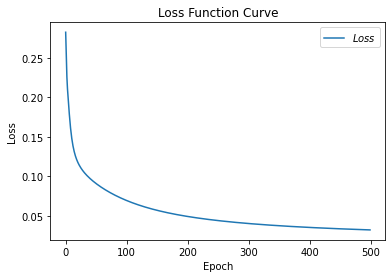

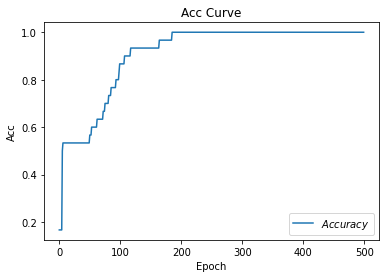

In [ ]:
# p45_iris.py
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为永不相见的训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度(求偏导)
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1    #计算前向传播的预测结果
        y = tf.nn.softmax(y)        # 变为概率分布
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()